In [ ]:
#Capomolin and Ramicane are the best treatments.
#Capomilin and Ramicane has similar results as a treatment.
#The study was applied in higher percentage in males mouses.

In [1]:
import pandas as pd
import scipy.stats as st
import statistics as st
import matplotlib_inline as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn provides a nice set of color palettes
from scipy.stats import linregress

In [2]:
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

In [3]:
df1= pd.read_csv(mouse_metadata)
df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
df2= pd.read_csv(study_results)
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
study_data_complete = pd.merge(df1, df2, how='left', on='Mouse ID')
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice_count = study_data_complete ['Mouse ID'].nunique()
mice_count

249

In [7]:
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
mice_count = clean_study_data_complete ['Mouse ID'].nunique()
mice_count

248

In [11]:
Mean_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
Mean_Tumor_vol

C:\Users\laura\AppData\Local\Temp\ipykernel_1772\2750649480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Mean_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
mice_count=clean_study_data_complete.groupby('Drug Regimen')['Mouse ID'].count()
mice_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [13]:
Median_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
Median_Tumor_vol


C:\Users\laura\AppData\Local\Temp\ipykernel_1772\62164806.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Median_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
Var_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Var_Tumor_vol

C:\Users\laura\AppData\Local\Temp\ipykernel_1772\2036461820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Var_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
Std_Var_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
Std_Var_Tumor_vol

C:\Users\laura\AppData\Local\Temp\ipykernel_1772\2340019136.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Std_Var_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
Sem_Var_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
Sem_Var_Tumor_vol

C:\Users\laura\AppData\Local\Temp\ipykernel_1772\2529955745.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sem_Var_Tumor_vol = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
Per_Tumor_Summary0 ={'Mean Tumor Volume': Mean_Tumor_vol,
    'Median Tumor Volume': Median_Tumor_vol, 
                      'Tumor Volume Variance' : Var_Tumor_vol, 
                      'Tumor Volume Std. Dev.': Std_Var_Tumor_vol,
                      'Tumor Volume Std. Err.': Sem_Var_Tumor_vol}

In [18]:
Per_Tumor_Summary = pd.DataFrame(Per_Tumor_Summary0)
Per_Tumor_Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
clean_study_data_complete_agg = clean_study_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
clean_study_data_complete_agg 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [20]:
mice_count= clean_study_data_complete.groupby('Drug Regimen')['Mouse ID'].count()
mice_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [21]:
New_df = pd.DataFrame(mice_count)
New_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<Axes: xlabel='Drug Regimen'>

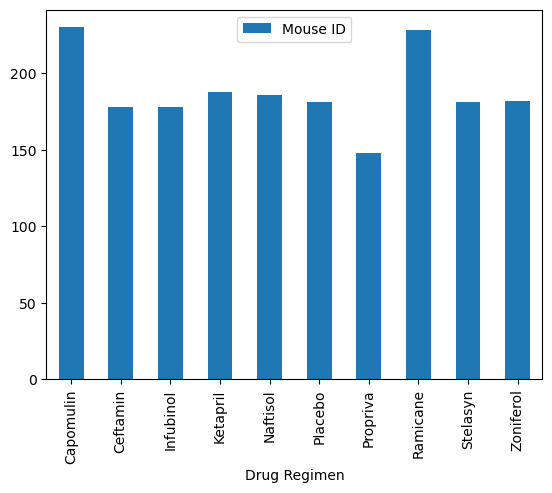

In [22]:
New_df.plot(kind='bar')

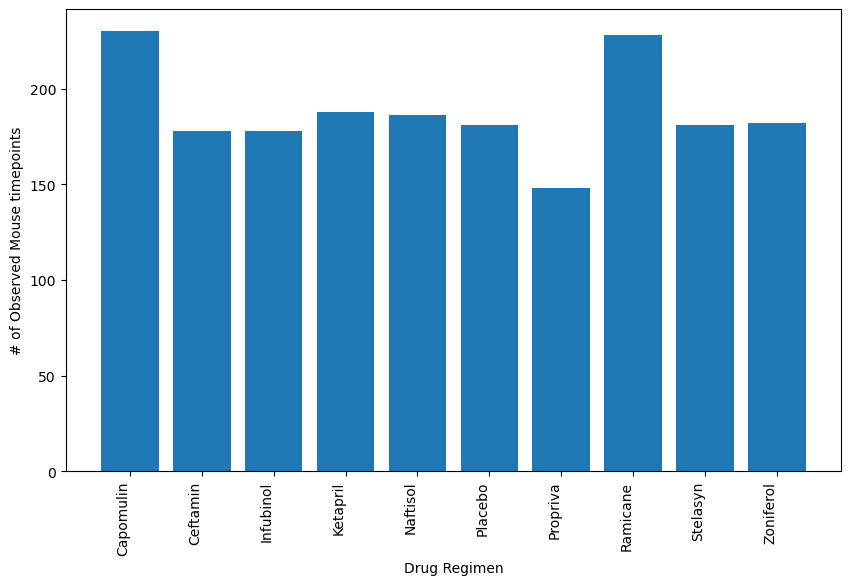

In [23]:
plt.figure(figsize=(10, 6))
bar_chart = plt.bar(New_df.index,New_df['Mouse ID'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse timepoints')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [24]:
Female_x_Male = clean_study_data_complete.groupby('Sex')['Mouse ID'].count()
Female_x_Male

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [25]:
Sex_df = pd.DataFrame(Female_x_Male)
Sex_df

,Mouse ID
Sex,
Female,922
Male,958


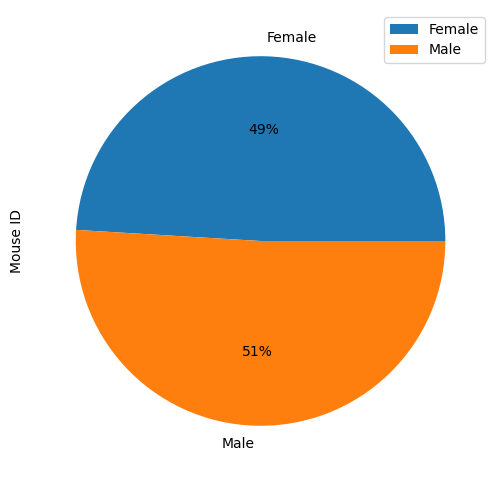

In [26]:
plot = Sex_df.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%')

In [27]:
labels = ["Female", "Male"]
sizes = [922,958]
colors = ["Orange","Blue"]
explode = (0.1,0.1)

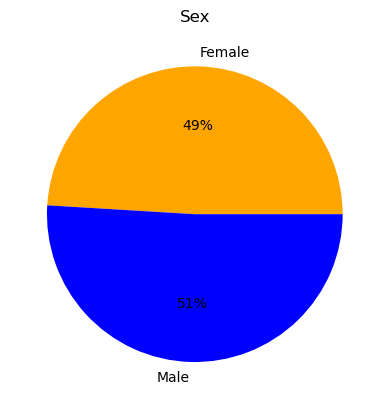

In [28]:
plt.pie(sizes,labels=labels,colors=colors, autopct="%1.f%%")
plt.title('Sex')
plt.show()

In [29]:
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
max_tumor = clean_study_data_complete.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [31]:
merged_data1 = max_tumor.merge(clean_study_data_complete, on=['Mouse ID','Timepoint'],how="left")
merged_data1

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
drug= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data_list = []
for treatment in drug:
    final_tumor_vol = merged_data1.loc[merged_data1["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data_list.append(final_tumor_vol)
    quartiles=final_tumor_vol.quantile([.25,.5,.75])
    lowerq= quartiles[.25]
    upperq= quartiles[.75]
    IQR=upperq-lowerq
    lowerb=lowerq-(1.5*IQR)
    upperb=upperq+(1.5*IQR)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lowerb) | (final_tumor_vol > upperb)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


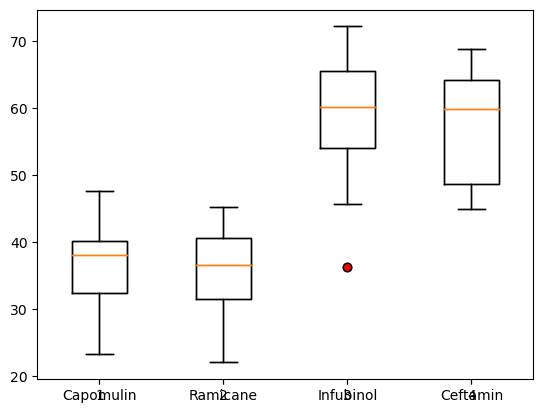

In [33]:
plt.boxplot(x=tumor_vol_data_list)
red_circle= dict(markerfacecolor='red', marker='o')
plt.boxplot(x=tumor_vol_data_list, labels = drug, flierprops=red_circle);

In [34]:
Capomulin_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == 'Capomulin']
Capomulin_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [35]:
mouseID='l509'
df7=Capomulin_data .loc[Capomulin_data ['Mouse ID'] == mouseID]
df7

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


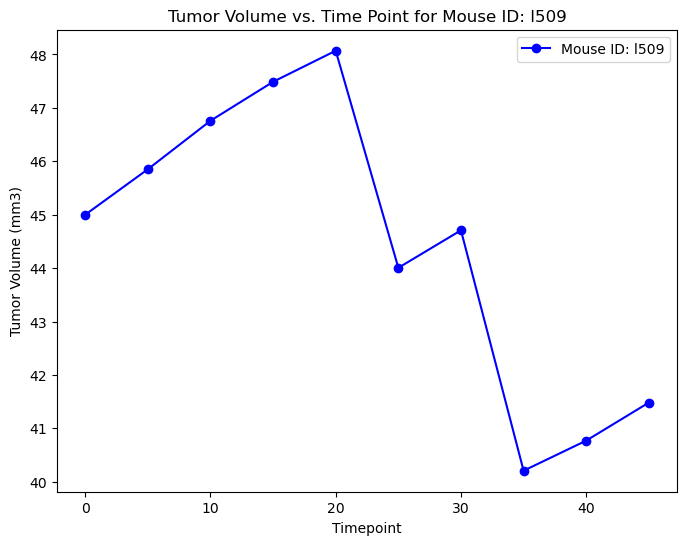

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(df7['Timepoint'], df7['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {mouseID}')
plt.title('Tumor Volume vs. Time Point for Mouse ID: {}'.format(mouseID))
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(False)
plt.show()

In [37]:
df8 = Capomulin_data.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]
df8

C:\Users\laura\AppData\Local\Temp\ipykernel_1772\2545718803.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df8 = Capomulin_data.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


Text(0, 0.5, 'Averange Tumor Volume (mm3)')

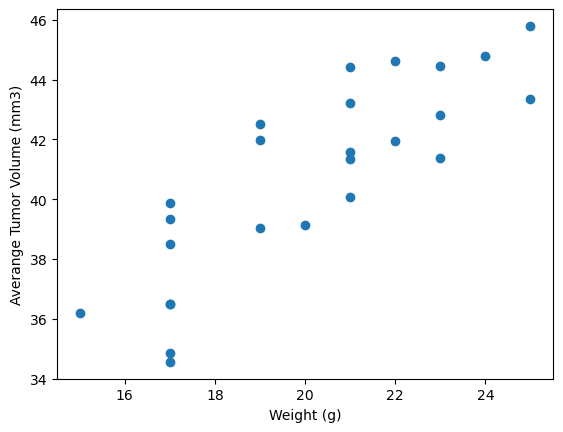

In [38]:
plt.scatter(df8['Weight (g)'],df8['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averange Tumor Volume (mm3)')

In [43]:
def plotLinearRegression(x_values,y_values,title,text_position):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regression_values,"r-")
    plt.annotate(line_text,text_position,color="red")
    plt.xlabel("Weight (g)")
    plt.ylabel("Tumor Volume (mm3)")
    print(f"The r- value is : {rvalue**2}")
    plt.show()

The r- value is : 0.7088568047708723


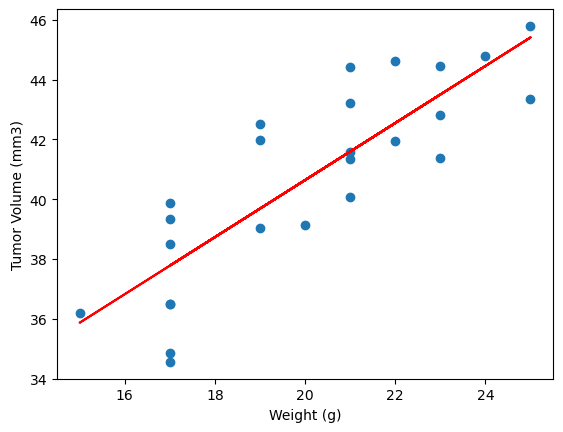

In [46]:
plotLinearRegression(df8.reset_index()['Weight (g)'],df8.reset_index()['Tumor Volume (mm3)'],"Weight (g)",(6,-10))